# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Kevin Amgad

ID: 52-4769

Tutorial: 6

---

Name: Omar Hafez

ID: 52-3035

Tutorial: 6

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices_OG.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df.head()

<ipython-input-58-1df82c3ce71a>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [59]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [60]:
uv = df['body'].unique()
uv

array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

In [61]:
PT_replacement= {'Crew Cab','Regular Cab', 'Double Cab','SuperCrew', 'Extended Cab', 'SuperCab','king cab', 'King Cab', 'extended cab','quad cab', 'supercab', 'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab', 'Club Cab', 'Access Cab', 'Cab Plus 4', 'crewmax cab', 'access cab', 'Mega Cab', 'regular cab', 'mega cab','regular-cab', 'Xtracab', 'xtracab'}
df['body'].replace(PT_replacement, 'Pickup Truck', inplace=True)

Sed_replacement= {'sedan','Sedan','G Sedan','g sedan'}
df['body'].replace(Sed_replacement, 'Sedan', inplace=True)

Cou_replacement = {'coupe','Coupe','g coupe','G Coupe','Genesis Coupe','genesis coupe','Elantra Coupe','CTS Coupe','CTS-V Coupe','Q60 Coupe','cts coupe','Koup'}
df['body'].replace(Cou_replacement, 'Coupe', inplace=True)

Con_replacement= {'Convertible','convertible','Beetle Convertible','G Convertible','G37 Convertible','Q60 Convertible','GranTurismo Convertible','beetle convertible','g convertible','granturismo convertible'}
df['body'].replace(Con_replacement, 'Convertible', inplace=True)

Hat_replacement= {'Hatchback','hatchback'}
df['body'].replace(Hat_replacement, 'Hatchback', inplace=True)

SUV_replacement={'SUV','suv'}
df['body'].replace(SUV_replacement, 'SUV', inplace=True)

Van_replacement={'Van','van','E-Series Van','Minivan','minivan','e-series van','promaster cargo van','Promaster Cargo Van','Transit Van'}
df['body'].replace(Van_replacement, 'Van', inplace=True)

Wag_replacement={'Wagon','wagon','CTS Wagon','TSX Sport Wagon','tsx sport wagon'}
df['body'].replace(Wag_replacement, 'Wagon', inplace=True)

df.to_csv('car_prices.csv', index=False)

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [62]:
import pandas as pd
import numpy as np

#Loading the dataset
try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')



#Checking for missing values
missing_values = df.isnull().sum()

#Droping rows with missing values:
df = df.dropna()

#Converting 'odometer' column to a numeric type (remove 'mi' and '.' to convert it to int)
df['odometer'] = df['odometer'].str.replace('mi', '').str.replace('.', '').astype(int)

#Converting the 'saledate' column to a datetime object
df['saledate'] = pd.to_datetime(df['saledate'])

#Renaming columns for better readability
df = df.rename(columns={'sellingprice': 'selling_price'})

#Removing Dollar Sign from 'mmr' and 'selling_price'
df['mmr'] = df['mmr'].str.replace('$', '').str.replace(',', '').astype(float)
df['selling_price'] = df['selling_price'].str.replace('$', '').str.replace(',', '').astype(float)

#Data Scaling/Normalization using Min-Max scaling:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['odometer', 'mmr', 'selling_price']] = scaler.fit_transform(df[['odometer', 'mmr', 'selling_price']])

#Saving the data to a new CSV file.
df.to_csv('car_prices.csv', index=False)

df.head()

<ipython-input-62-f32ad11786a5>:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['odometer'] = df['odometer'].str.replace('mi', '').str.replace('.', '').astype(int)
<ipython-input-62-f32ad11786a5>:28: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['mmr'] = df['mmr'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-62-f32ad11786a5>:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['selling_price'] = df['selling_price'].str.replace('$', '').str.replace(',', '').astype(float)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,selling_price,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,0.050403,black,gray,the hertz corporation,0.075184,0.046770,2015-06-02 02:30:00+07:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,0.017845,gray,—,award auto sales and leasing inc,0.196438,0.129432,2015-02-18 07:15:00+08:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,0.021121,silver,black,lexus financial services,0.151910,0.104633,2015-01-20 01:30:00+08:00
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,0.145302,black,black,peddle llc,0.025004,0.013270,2015-03-04 07:10:00+08:00
4,2014,Ford,E-Series Van,E-250,Van,automatic,1ftne2ew0eda31832,wa,4.9,0.006713,white,gray,u-haul,0.153965,0.095497,2015-02-18 06:45:00+08:00


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

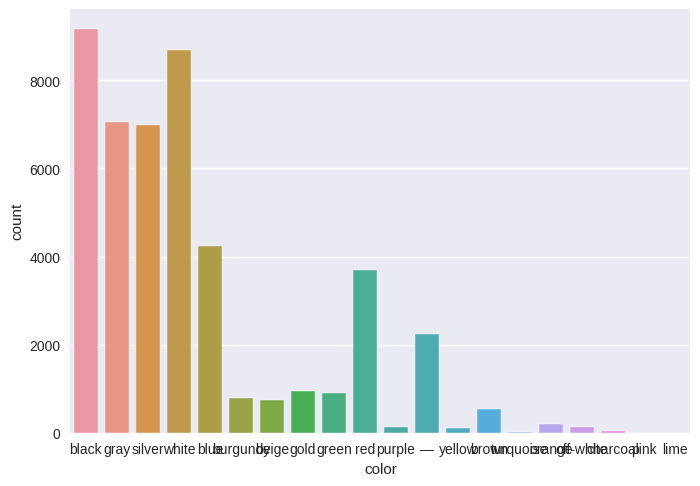

In [63]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

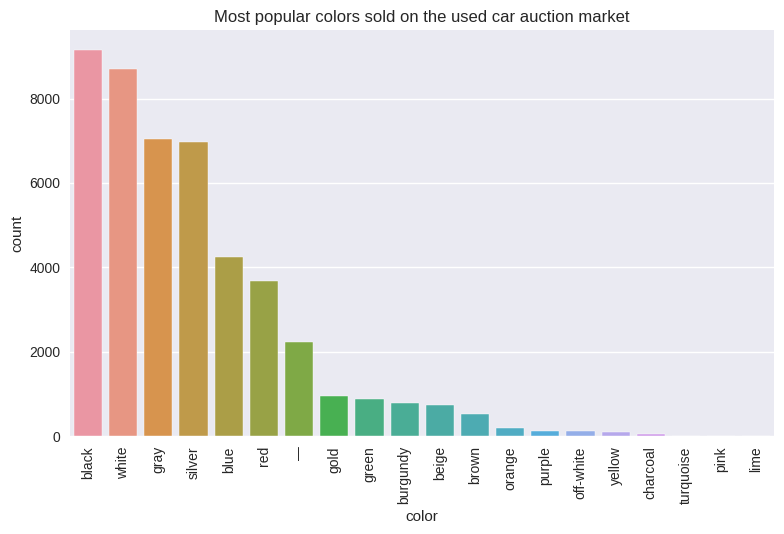

In [64]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

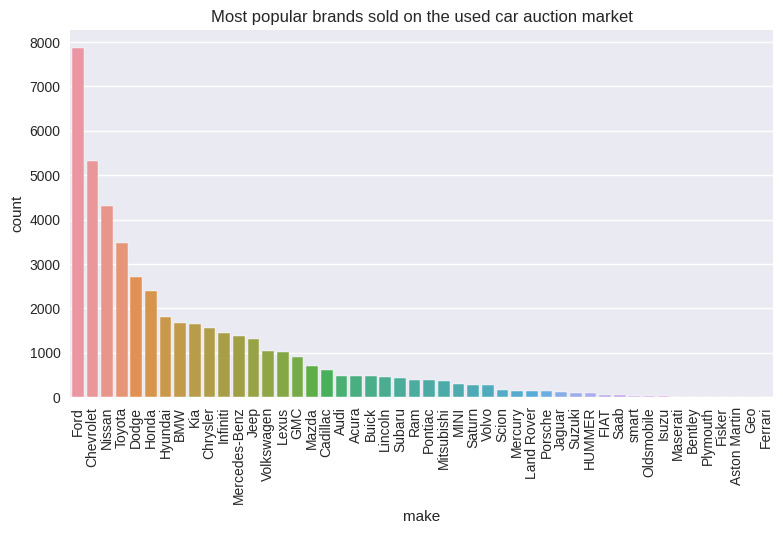

In [65]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular brands sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: Ford, Chevrolet, Nissan

**Q2: Draw a bar plot showing the selling price of each of the transmission categories. Do automatic cars, on
average (mean), sell for a higher price than manual cars?**

(Use the following link for reference:
https://seaborn.pydata.org/generated/seaborn.barplot.html)


**Visualization**

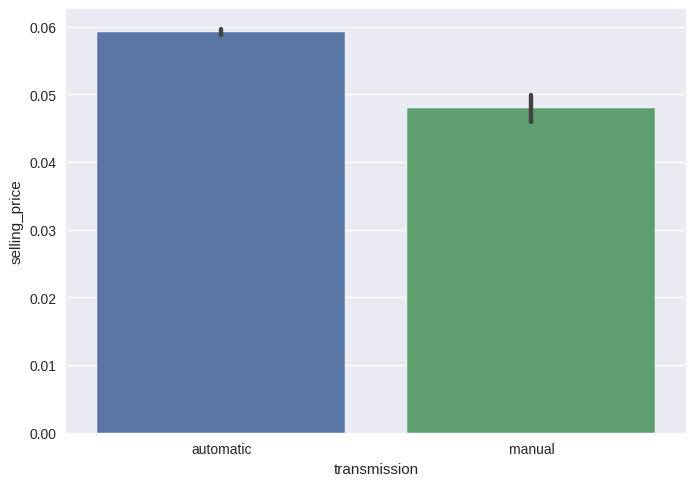

In [66]:
sns.barplot(x='transmission',y='selling_price', data=df);

**Answer for Q2**: Yes automatic cars have a higher price than manual cars

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

<Axes: xlabel='make', ylabel='selling_price'>

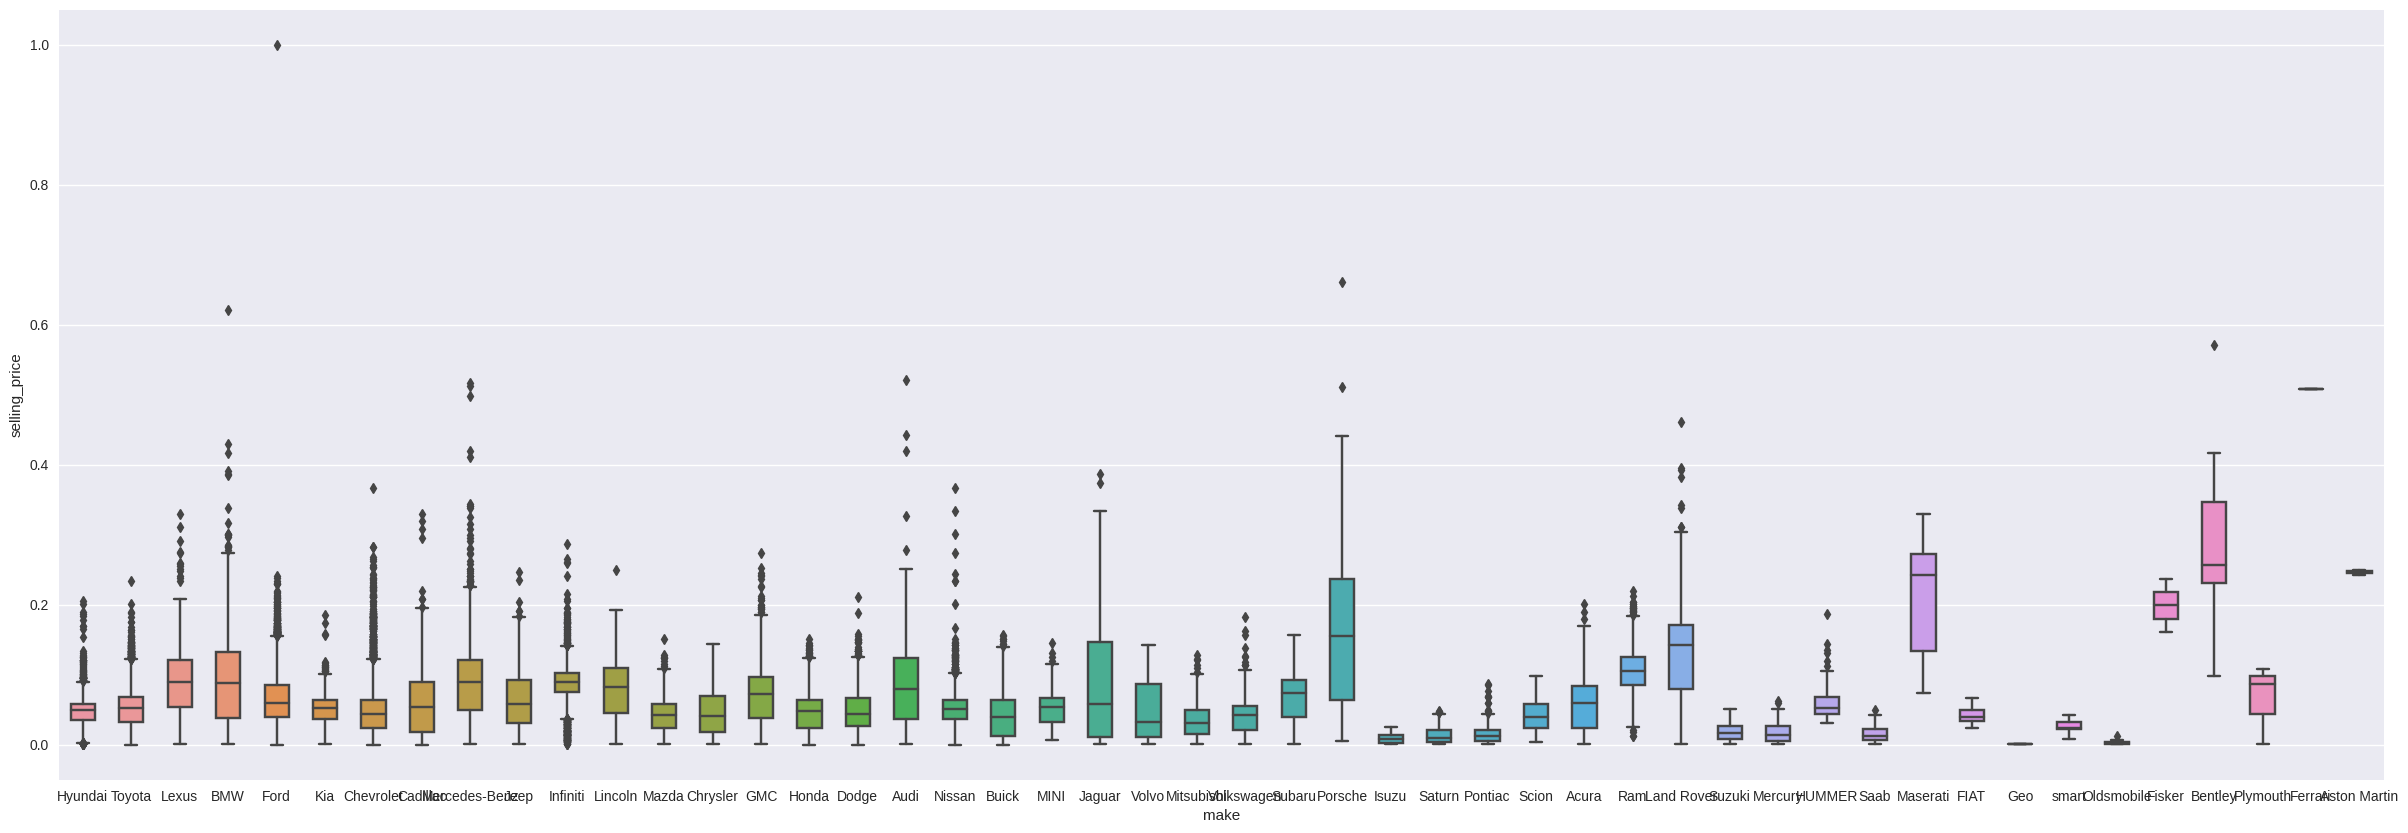

In [67]:
plt.figure(figsize=(30,10))
sns.boxplot(df, x='make', y='selling_price', width=0.5)

**Answer for Q3**: Porsche and Jaguar are the brands that show the most variation in prices, with the highest and lowest values in the dataset. When it comes to the most expensive cars, Porsche and Bentley take the lead.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

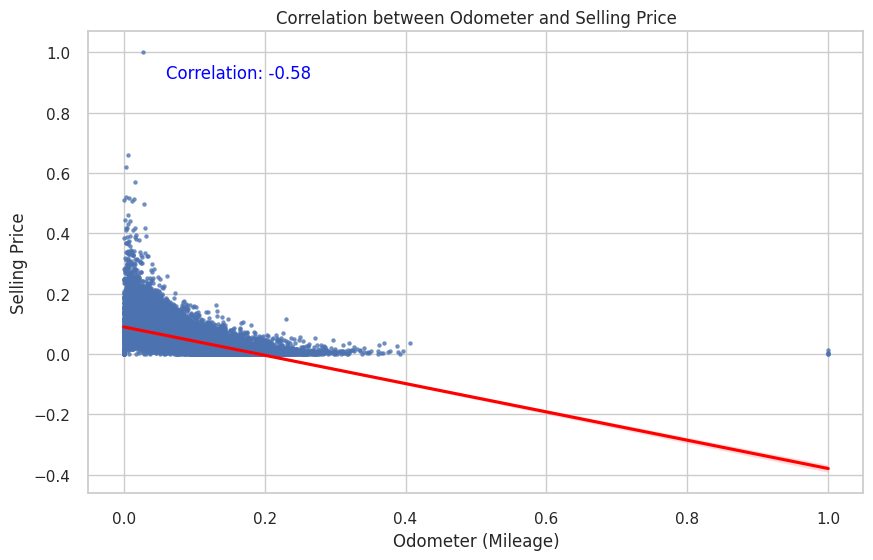

In [68]:
#Loading the cleaned dataset
df = pd.read_csv('car_prices.csv')

#Calculating the correlation between 'odometer' and 'selling_price'
correlation = df['odometer'].corr(df['selling_price'])

#Creating a scatter plot with a regression line
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='odometer', y='selling_price', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})

#Adding correlation value to the plot
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')

#Settnig plot labels and title
plt.xlabel('Odometer (Mileage)')
plt.ylabel('Selling Price')
plt.title('Correlation between Odometer and Selling Price')

#Showing the plot
plt.show()

**Answer for Q4**: The coorealtion betweem both attributes is in negative which means that they are not coorelated. However, if you noticed the graph you will find out that, at the very beginning the selling price was decreasing with the increase of mileage untill certain point where the selling price cannot get lower even if the mileage is still increasing, that is why they are not coorelated.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

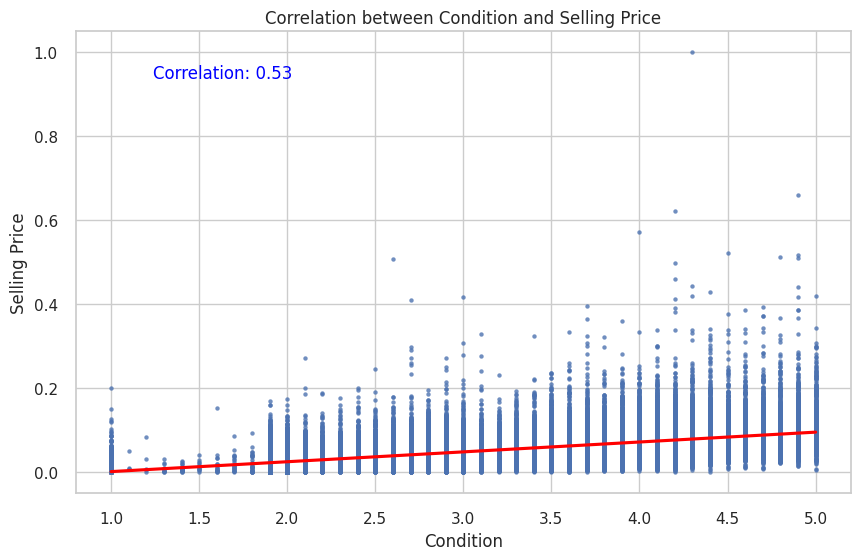

In [69]:
#Loading the cleaned dataset
df = pd.read_csv('car_prices.csv')  # Make sure to use the path to your cleaned dataset

#Calculating the correlation between 'condition' and 'selling_price'
correlation = df['condition'].corr(df['selling_price'])

#Creating a scatter plot with a regression line
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='condition', y='selling_price', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})

#Adding correlation value to the plot
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')

#Setting plot labels and title
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.title('Correlation between Condition and Selling Price')

#Showing the plot
plt.show()

**Answer for Q5**: The coorealtion betweem both attributes is in postive which means that they are coorelated. Although, as it is shown in the graph, at the ver begining of the graph there was some cars with a worse condition than others that were sold with a higher price, however, the trending coorelation shows that when the cars' condtion gets better eventually its selling price will get higher and the opposite is true, that is why they are coorelated.

**Q6: Draw a bar plot showing the selling price of each of the body categories. Are there differences in the average
(mean of) car price due to the car’s body type? If so, rank their order and state the most expensive and least
expensive car body type.**

**Visualization**

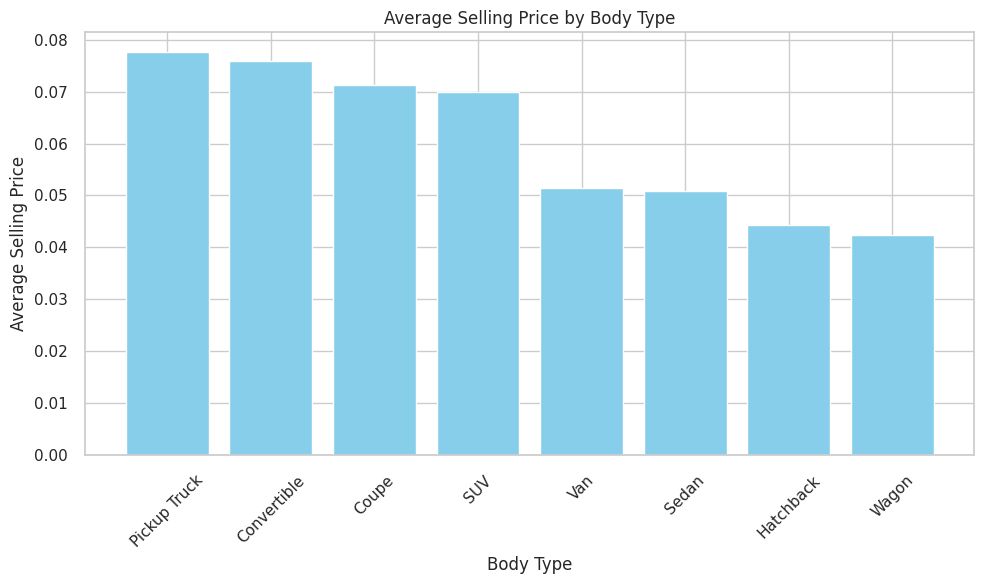

The most expensive car body type is Pickup Truck
The least expensive car body type is Wagon


In [70]:
import pandas as pd
import matplotlib.pyplot as plt

#Loading the cleaned dataset
df = pd.read_csv('car_prices.csv')

#Grouping the data by 'body' and calculate the mean selling price for each body type
body_mean_prices = df.groupby('body')['selling_price'].mean().reset_index()

#Sorting the data by mean selling price in descending order
body_mean_prices = body_mean_prices.sort_values(by='selling_price', ascending=False)

#Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(body_mean_prices['body'], body_mean_prices['selling_price'], color='skyblue')
plt.xlabel('Body Type')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Body Type')

#Displaying the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Finding the most and least expensive car body type
most_expensive = body_mean_prices.iloc[0]['body']
least_expensive = body_mean_prices.iloc[-1]['body']

print(f"The most expensive car body type is {most_expensive}")
print(f"The least expensive car body type is {least_expensive}")


**Answer for Q6**: Yes, there are diffrences in average car price according to its body type as it is shown in the graph. So the most expensive car body type is Pickup Truck while the least expensive car body type is Wagon.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [71]:
#List of unnecessary columns to drop
columns_to_drop = ['vin', 'state', 'saledate','seller','mmr']
df = df.drop(columns=columns_to_drop)

df.to_csv('car_prices.csv', index=False)

df.head()


,year,make,model,trim,body,transmission,condition,odometer,color,interior,selling_price
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,3.9,0.050403,black,gray,0.046770
1,2014,Toyota,4Runner,SR5,SUV,automatic,4.9,0.017845,gray,—,0.129432
2,2012,Lexus,IS 250,Base,Sedan,automatic,4.1,0.021121,silver,black,0.104633
3,2002,BMW,X5,4.4i,SUV,automatic,1.9,0.145302,black,black,0.013270
4,2014,Ford,E-Series Van,E-250,Van,automatic,4.9,0.006713,white,gray,0.095497


In [73]:
#one-hot encoding
df = pd.read_csv('car_prices.csv')
onehotencoding_columns=['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']
df = pd.get_dummies(df, columns=onehotencoding_columns)
df.to_csv('car_prices.csv', index=False)

df.head()

,year,condition,odometer,selling_price,make_Acura,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,...,interior_green,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow,interior_—
0,2013,3.9,0.050403,0.046770,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,4.9,0.017845,0.129432,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2012,4.1,0.021121,0.104633,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,0.145302,0.013270,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,0.006713,0.095497,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modelling

_Apply the linear regression model below._

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


x = df.drop(['selling_price'],axis=1)
y = df['selling_price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train);

parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,1.215167e+09
1,theta_1,year,4.422645e-03
2,theta_2,condition,5.623162e-03
3,theta_3,odometer,-1.865900e-01
4,theta_4,make_Acura,-1.401782e+09
...,...,...,...
1839,theta_1839,interior_silver,-9.646268e+07
1840,theta_1840,interior_tan,-9.646268e+07
1841,theta_1841,interior_white,-9.646268e+07
1842,theta_1842,interior_yellow,-9.646268e+07


## Model Evaluation

_Evaluate the model you applied._

In [75]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  13165717.240179759
R^2 obtained is: -9.678204263092611e+16


## Conclusion and Recommendations

Comment on the model accuracy, and thoroughly explain its value, as well as your findings from the model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: The linear regression model we have trained to estimate used car prices is performing extremely poorly, as indicated by a remarkably high Root Mean Square Error (RMSE) and a negative R-squared (R²) value.

These metrics suggest that the model's predictions deviate significantly from actual selling prices and that it does not fit the data at all. Several factors could be contributing to this poor performance, including feature selection, data quality, and model complexity.

To improve the model, it is crucial to thoroughly assess and clean the data, select more relevant features, experiment with different regression models, implement cross-validation, and consider regularization techniques. Additionally, collecting a larger dataset might enhance the model's predictive capabilities.

In its current state, this model is not recommended for a used car dealership seeking reliable price estimates, as its inaccuracies could lead to substantial financial losses and unreliable pricing decisions.